In [ ]:
# String Art Tutorial
# https://www.instructables.com/String-Art-Map/

In [6]:
import osmnx as ox
import shapely.affinity
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

<Axes: >

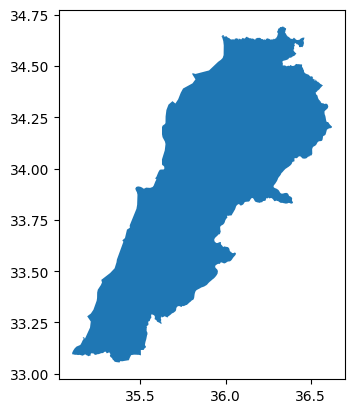

In [10]:
admin = ox.geocode_to_gdf("Lebanon")

# High-resolution land polygons (10m)
land = gpd.read_file(
    "https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip"
)

# Match CRS
land = land.to_crs(admin.crs)

# Clip marine territory
admin_land = gpd.overlay(admin, land, how="intersection")

admin_land.plot()

In [11]:
# Extract Boundary Line and Define no. of Nails

geom = admin_land.geometry.iloc[0]
n_nails = 50

In [12]:
outline = geom.exterior
length = outline.length

# Calculate dist btw nails
distances = np.linspace(0, length, n_nails, endpoint=False)

distances

array([0.        , 0.13644177, 0.27288354, 0.4093253 , 0.54576707,
       0.68220884, 0.81865061, 0.95509237, 1.09153414, 1.22797591,
       1.36441768, 1.50085944, 1.63730121, 1.77374298, 1.91018475,
       2.04662651, 2.18306828, 2.31951005, 2.45595182, 2.59239358,
       2.72883535, 2.86527712, 3.00171889, 3.13816065, 3.27460242,
       3.41104419, 3.54748596, 3.68392772, 3.82036949, 3.95681126,
       4.09325303, 4.22969479, 4.36613656, 4.50257833, 4.6390201 ,
       4.77546186, 4.91190363, 5.0483454 , 5.18478717, 5.32122893,
       5.4576707 , 5.59411247, 5.73055424, 5.866996  , 6.00343777,
       6.13987954, 6.27632131, 6.41276308, 6.54920484, 6.68564661])

In [13]:
# Turn dist to geometry Points

nail_points = [outline.interpolate(d) for d in distances]
nail_points

[<POINT (35.102 33.095)>,
 <POINT (35.176 33.172)>,
 <POINT (35.2 33.287)>,
 <POINT (35.25 33.408)>,
 <POINT (35.336 33.502)>,
 <POINT (35.392 33.624)>,
 <POINT (35.444 33.735)>,
 <POINT (35.483 33.863)>,
 <POINT (35.557 33.906)>,
 <POINT (35.63 33.995)>,
 <POINT (35.647 34.114)>,
 <POINT (35.648 34.235)>,
 <POINT (35.711 34.323)>,
 <POINT (35.804 34.414)>,
 <POINT (35.875 34.472)>,
 <POINT (35.986 34.545)>,
 <POINT (35.993 34.643)>,
 <POINT (36.082 34.631)>,
 <POINT (36.19 34.637)>,
 <POINT (36.297 34.635)>,
 <POINT (36.351 34.669)>,
 <POINT (36.446 34.635)>,
 <POINT (36.415 34.611)>,
 <POINT (36.37 34.536)>,
 <POINT (36.399 34.5)>,
 <POINT (36.495 34.45)>,
 <POINT (36.571 34.404)>,
 <POINT (36.574 34.318)>,
 <POINT (36.605 34.223)>,
 <POINT (36.559 34.134)>,
 <POINT (36.474 34.05)>,
 <POINT (36.37 34.008)>,
 <POINT (36.283 33.909)>,
 <POINT (36.39 33.849)>,
 <POINT (36.285 33.843)>,
 <POINT (36.171 33.843)>,
 <POINT (36.062 33.815)>,
 <POINT (35.98 33.724)>,
 <POINT (35.964 33.641)>,

In [14]:
minx, miny, maxx, maxy = geom.bounds
bbox_width_m = maxx - minx
bbox_height_m = maxy - miny
edge_length = (bbox_width_m + bbox_height_m)/2

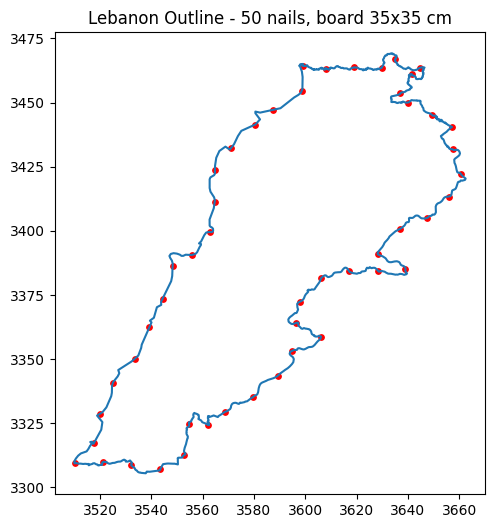

In [17]:
plt.figure(figsize=(6, 6))
x, y = geom.exterior.xy
plt.plot(np.array(x)*100, np.array(y)*100) # convert to cm

plt.gca().set_aspect('equal', 'box')

# Add Nails Points
plt.scatter(
    [p.x * 100 for p in nail_points], [p.y * 100 for p in nail_points], s=15, color='r'
)
plt.title(f'Lebanon Outline - {n_nails} nails, board 35x35 cm')
plt.show()

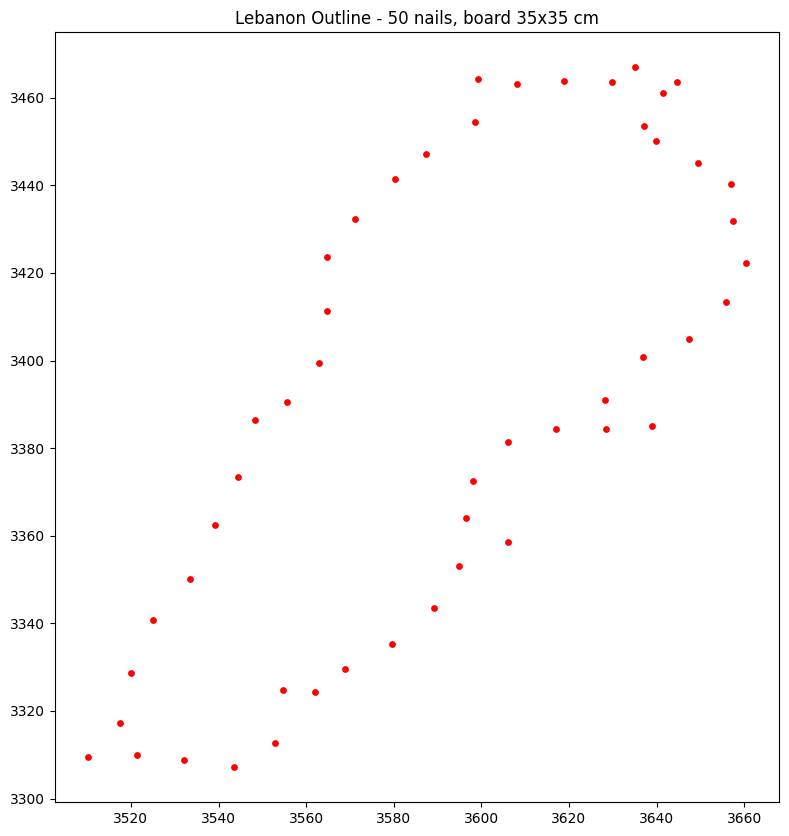

In [18]:
plt.figure(figsize=(10, 10))

x, y = geom.exterior.xy

plt.gca().set_aspect('equal', 'box')

# Add Nails Points
plt.scatter(
    [p.x * 100 for p in nail_points], [p.y * 100 for p in nail_points], s=15, color='r'
)
plt.title(f'Lebanon Outline - {n_nails} nails, board 35x35 cm')
plt.show()

# Simulating the String Maps

In [19]:
x = np.array([p.x for p in nail_points])
y = np.array([p.y for p in nail_points])
n = len(x)

In [28]:
def strings_random (n=100, n_lines=400):
    lines = []
    for _ in range(n_lines):
        i, j = np.random.choice(n, 2, replace=False)
        lines.append((i, j))
    return lines

def strings_polygonal (n=100, step=9):
    return [(i, (i + step)%n) for i in range(n)]

def strings_spoke(n=100):
    anchor = 0 # central node
    return [(anchor, i) for i in range (1, n)]

# Connect point to the opp
def strings_cross(n=100):
    return [(i, (i + n//2) % n) for i in range(n//2)]

def strings_alternating(n=100, step_small=3, step_large=15):
    lines = []
    for i in range(n):
        step = step_small if i % 2 == 0 else step_large
        lines.append((i, (i + step) % n))
    return lines

def strings_multispoke(n, anchors=4):
    if isinstance(anchors, int):
        anchor_ids = np.linspace(0, n-1, anchors, dtype = int)
    else:
        anchor_ids = np.array(anchors)

    lines = []
    for a in anchor_ids:
        for i in range (n):
            if i != a: # dont connect nail to itself
                lines.append((a, i))
    return lines

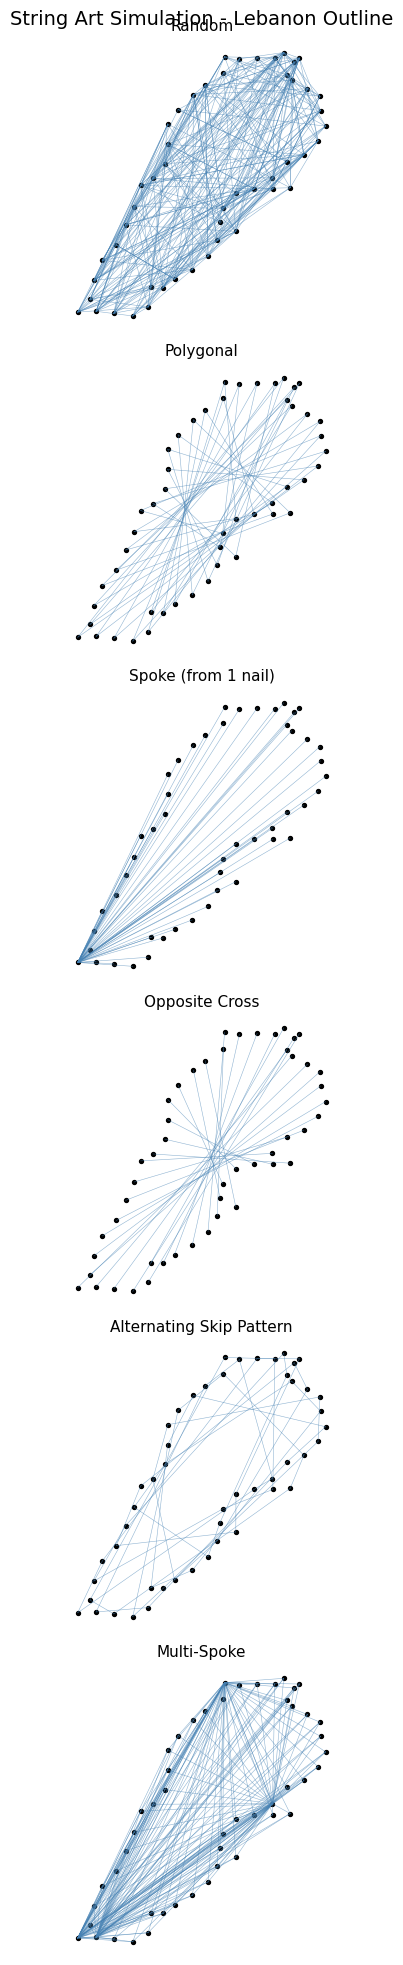

In [32]:
fig, axes = plt.subplots(6, 1, figsize = (6, 20))

methods = [
    ('Random', strings_random(n, 300)),
    ('Polygonal', strings_polygonal(n, step=20)),
    ('Spoke (from 1 nail)', strings_spoke(n)),
    ('Opposite Cross', strings_cross(n)),
    ('Alternating Skip Pattern', strings_alternating(n)),
    ('Multi-Spoke', strings_multispoke(n, anchors=4))
]

for ax, (title, lines) in zip(axes.flat, methods):
    ax.scatter(x, y, s=8, color='black')
    for i, j in lines:
        ax.plot([x[i], x[j]], [y[i], y[j]], lw=0.4, alpha=0.6, color='steelblue')
    ax.set_aspect('equal', 'box')
    ax.set_title(title, fontsize=11)
    ax.axis('off')

plt.suptitle('String Art Simulation - Lebanon Outline', fontsize=14)
plt.tight_layout()
plt.show()